## <font color='Magenta'> **SpaceObject Classification Model**



bing-image Downloader it's a package to download images from bing

In [ ]:
!pip install bing-image-downloader

for creating folder/dataset of images

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader

To Download images--->I have downloaded 50 images of each category

In [ ]:
downloader.download("Pulsar stars in space images",limit = 100,output_dir= 'images',adult_filter_off = True)

[%] Downloading Images to /content/images/Pulsar stars in space images


[!!]Indexing page: 1

[%] Indexed 103 Images on Page 1.


[%] Downloading Image #1 from http://img.huffingtonpost.com/asset/2000_1000/58aece08290000f616f2842c.jpeg
[Error]Invalid image, not saving http://img.huffingtonpost.com/asset/2000_1000/58aece08290000f616f2842c.jpeg

[!] Issue getting: http://img.huffingtonpost.com/asset/2000_1000/58aece08290000f616f2842c.jpeg
[!] Error:: Invalid image, not saving http://img.huffingtonpost.com/asset/2000_1000/58aece08290000f616f2842c.jpeg

[%] Downloading Image #1 from https://media.wired.com/photos/5a593a7ff11e325008172bc2/master/w_2400,c_limit/pulsar-831502910.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/f0/a5/31/f0a53181b479b4160736eb460888959f.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://images.alphacoders.com/510/510805.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/c

In [ ]:
downloader.download("black hole stars in space images",limit = 100,output_dir= 'images',adult_filter_off = True)

[%] Downloading Images to /content/images/black hole stars in space images


[!!]Indexing page: 1

[%] Indexed 100 Images on Page 1.


[%] Downloading Image #1 from http://static1.businessinsider.com/image/597b68c0b50ab1011c8b523b-1352/black-hole-stars-galaxies-warped-space-nasa.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://images.wallpapersden.com/image/download/black-hole-space-stars_Z2ZmammUmZqaraWkpJRobWllrWdma2U.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/cb/40/45/cb4045eac6498934f19cbc886d06a5a1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://s1.ibtimes.com/sites/www.ibtimes.com/files/styles/embed/public/2017/05/19/black-hole-eats.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA16605_hires.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://sum.cuny.edu/content/uploads/2019/12/BH.jpg
[%] File Downloaded !

[%] Downloading Ima

In [ ]:
downloader.download("white dwarf stars in space",limit = 100,output_dir= 'images',adult_filter_off = True)

[%] Downloading Images to /content/images/white dwarf stars in space


[!!]Indexing page: 1

[%] Indexed 101 Images on Page 1.


[%] Downloading Image #1 from https://cdn.vox-cdn.com/thumbor/POiCpqjf6Xfj8ah3zgbZ3no0OcM=/0x285:3000x2285/1200x800/filters:focal(0x285:3000x2285)/cdn.vox-cdn.com/uploads/chorus_image/image/49205119/white_dwarf_kinda3.0.0.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://scitechdaily.com/images/Astronomers-Observe-Contracting-White-Dwarf-Star-For-The-First-Time-1024x1024.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://thescienceexplorer.com/sites/thescienceexplorer.com/files/blog/120718.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://scitechdaily.com/images/Hubble-Views-Exploding-White-Dwarf-Star.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://imgix.gizmodo.com.au/content/uploads/sites/2/2020/09/17/wrw3qco0tv6tfvkqgqqg.jpg?auto=format&amp;fit=fill&amp;q=65&amp;w=1280
[%] File Downloaded !

[%] Do

To Download the images folder further!!

In [ ]:
import shutil
shutil.make_archive('images', 'zip', 'images')

'/content/images.zip'

## <font color='Blue'> Model Building Without CNN

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [ ]:
target = []
images = []
flat_data = []
DATA = '/content/images'
CATEGORIES = ["black hole stars in space images","Pulsar stars in space images","white dwarf stars in space"]
for x in CATEGORIES:
  class_num = CATEGORIES.index(x)
  path = os.path.join(DATA,x)
  for img in os.listdir(path):
    img_array =imread(os.path.join(path,img),0)
    #print(plt.imshow(img_array))
    img_resized =resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
    
 
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size = 0.3,random_state = 1)

In [ ]:
import numpy as np
np.set_printoptions(linewidth=900)
print(images[1])

In [ ]:
!pip install globe

## <font color='Blue'> Model Builting Using pre-trained CNN model

In [ ]:
import tensorflow as tf
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob as glob
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [ ]:
vgg16 = keras.applications.vgg16

We tried with VGG16,ResNet50,InceptionV3----> Finally VGG16 has given descent Results,Hence we used that for model building

In [ ]:
IMG_SIZE = [224,224]
vgg = vgg16.VGG16(input_shape = IMG_SIZE + [3],weights = 'imagenet',include_top =False)

For Adding our parameters to fully connected layer(i.e. simple NN) we freezed last layer

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#folders = glob('/content/images')

In [ ]:
z = vgg.output

Flattened the parametrs to feed into neural network && added Dense layers

In [ ]:
z = Flatten()(z)
z = Dense(512,activation='relu')(z)
z = Dense(256,activation='relu')(z)
z = Dense(128,activation='relu')(z)
#z = Dense(28,activation='relu')(z)
prediction = Dense(3,activation = 'softmax')(z)

In [ ]:
model = Model(inputs= vgg.input,outputs = prediction)

In [ ]:
plt.figure(figsize=(5,2))
tf.keras.utils.plot_model(model)
plt.savefig('model.jpg')

<Figure size 360x144 with 0 Axes>

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Model Compilation

In [ ]:
from keras import metrics

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])

Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [ ]:
#train_datagen = np.expand_dims(train_datagen, axis=0)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#test_datagen = np.expand_dims(test_datagen, axis=0)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/images',target_size = (224,224),batch_size =32,class_mode = 'sparse')

Found 290 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/images',target_size = (224,224),batch_size = 32,class_mode = 'sparse')

Found 290 images belonging to 3 classes.


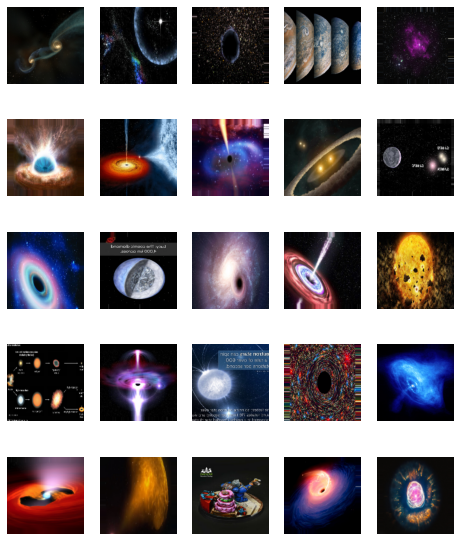

In [ ]:
a = training_set.class_indices
class_names = list(a.keys()) # storing class/breed names in a list
#CATEGORIES = ["black holes","pulsar stars","white dwarf star"]
#labels = []
#categories = CATEGORIES.index(x)
#print(categories)
x,y = next(training_set)
def plot_images(img,labels):

  plt.figure(figsize=[8,10])
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.imshow(img[i])
      #plt.title(class_names(i))
      plt.axis('off')
          
plot_images(x,y)

Backpropagation For model learning using epochs and Fit for our training data

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_ending(self,epoch,logs={}):
    if(logs.get('accuracy')>0.95):
      print("Reached 95% accuracy,so Stop the training")
      self.Model.stop_training=True

#Instantiate callback
callback = mycallback()

In [ ]:
r= model.fit(training_set,validation_data = test_set,epochs = 10,steps_per_epoch =len(training_set),validation_steps = len(test_set),callbacks = [callback])

Epoch 1/10
10/10 [==============================] - 24s 2s/step - loss: 1.6608 - accuracy: 0.3552 - val_loss: 0.9852 - val_accuracy: 0.5690
Epoch 2/10
10/10 [==============================] - 22s 2s/step - loss: 1.1296 - accuracy: 0.5034 - val_loss: 0.8653 - val_accuracy: 0.5828
Epoch 3/10
10/10 [==============================] - 22s 2s/step - loss: 1.0087 - accuracy: 0.5379 - val_loss: 0.7311 - val_accuracy: 0.6241
Epoch 4/10
10/10 [==============================] - 22s 2s/step - loss: 0.6910 - accuracy: 0.7000 - val_loss: 0.5501 - val_accuracy: 0.7966
Epoch 5/10
10/10 [==============================] - 22s 2s/step - loss: 0.8223 - accuracy: 0.6483 - val_loss: 0.6299 - val_accuracy: 0.6897
Epoch 6/10
10/10 [==============================] - 22s 2s/step - loss: 0.6731 - accuracy: 0.7034 - val_loss: 0.4895 - val_accuracy: 0.8241
Epoch 7/10
10/10 [==============================] - 22s 2s/step - loss: 0.5690 - accuracy: 0.7517 - val_loss: 0.4064 - val_accuracy: 0.8621
Epoch 8/10
10/10 [==

In [ ]:
#test_set = np.expand_dims(test_set, axis=0)

In [ ]:
'''
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=15
THIRD_IMAGE=29
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
active_model = tf.keras.models.Model(inputs = model.input,outputs = model.output)
for i in range(0,4):
  f1 = active_model.predict(test_set[FIRST_IMAGE])[i]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
'''

In [ ]:
r.history['loss']

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

Saved and load the model

In [ ]:
model.save('trmodel.h5')

In [ ]:
mymodel = load_model('trmodel.h5')

To check Model Working

In [ ]:
url = input('enter the url')
img =image.load_img(url, target_size=(224, 224,3))
x = image.img_to_array(img)
print(np.min(x), np.max(x))
print(x.shape)
xs = np.expand_dims(x, axis=0)
print(xs.shape)
xs = preprocess_input(xs)
features = mymodel.predict(xs)
print(features)
plt.imshow(img)

## <font color ='Purple'> Here Model Building using SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
param_grid = [
              {'C' :[1,10,100,1000],'kernel':['poly']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf','sigmoid']},
]
svc = svm.SVC(decision_function_shape='ovr',random_state=1)
clf = GridSearchCV(svc,param_grid)
#x_train = [np.concatenate(i) for i in x_train]
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.5111111111111111

In [ ]:
confusion_matrix(y_pred,y_test)

array([[18, 10, 11],
       [ 6, 15,  5],
       [ 4,  8, 13]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.46      0.54        39
           1       0.45      0.58      0.51        26
           2       0.45      0.52      0.48        25

    accuracy                           0.51        90
   macro avg       0.52      0.52      0.51        90
weighted avg       0.53      0.51      0.51        90



SVC has given--->50% accuracy

CNN has given--->93% accuracy

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Model Working For SVC

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
flat_data = []
url = input('enter the url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

In [ ]:
#!ngrok authtoken 1lK3c47A9GAl1H6Zbs7BhYioq7h_5GgMFeSZjrF11J4YKDcC4

In [ ]:
#!curl -LkO https://raw.githubusercontent.com/remoteit/installer/master/scripts/auto-install.sh
#! chmod +x ./auto-install.sh
#! sudo ./auto-install.sh

In [ ]:
#! sudo connectd_installer

In [ ]:
#from pyngrok import ngrok

In [ ]:
%%writefile my_app.py
import streamlit as st
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize
import pickle
from PIL import Image

rad = st.sidebar.radio("Navigation",["About","Model"])

if rad == "About":
  st.header("The APP is actually made for recognition of space objects")
  if st.checkbox("Description.."):
    st.write("The app mainly classifies black holes, pulsar stars and white dwarf")
    st.write("Because, They formed after the death of any neutron or super red giant star having higher chandra shekhara limit")
    option = ('Black Hole','Pulsar star','White Dwarf')
    option_dis = list(range(len(option)))
    x = st.selectbox("Choose object",option_dis,format_func=lambda x: option[x])
    if x == 0:
      st.text("""A black hole is a place in space where gravity pulls so much that even light can not get out. 
                  The gravity is so strong because matter has been squeezed into a tiny space. 
                  This can happen when a star is dying.
                  Because no light can get out, people can't see black holes. 
                  They are invisible. Space telescopes with special tools can help find black holes. 
                  The special tools can see how stars that are very close to black holes act differently than other stars. 
                  For More Info: Visit""")
      st.markdown('https://www.nasa.gov/audience/forstudents/k-4/stories/nasa-knows/what-is-a-black-hole-k4.html')
    if x == 1:
      st.text("""Pulsars are spherical, compact objects that are about the size of a large city but contain more mass than the sun. 
            Scientists are using pulsars to study extreme states of matter, search for planets beyond Earth's solar system and 
            measure cosmic distances. 
            Pulsars also could help scientists find gravitational waves, 
            which could point the way to energetic cosmic events like collisions between 
            supermassive black holes.
            for more info about black hole collision refer LIGO observatory
            """)
      st.markdown('https://www.space.com/32661-pulsars.html')
    if x == 2:
      st.text("""Pushing the limits of its powerful vision, NASA's Hubble Space Telescope uncovered the oldest burned-out stars 
      in our Milky Way Galaxy. 
      These extremely old, dim "clockwork stars" provide a completely independent reading on the age of the universe.

      The ancient white dwarf stars, as seen by Hubble, are 12-13 billion years old. 
      Because earlier Hubble observations show that the first stars formed less than 1 billion years after the universe's 
      birth in the big bang,
      finding the oldest stars puts astronomers well within arm's reach of calculating the absolute age of the universe.""")
      st.markdown('https://www.nasa.gov/multimedia/imagegallery/image_feature_734.html')
      

model = pickle.load(open('img_model.p','rb'))


if rad == "Model":
  st.title('IMAGE CLASSIFIER:star:')
  st.text('Upload images here:')
  uploaded_file = st.file_uploader("Choose an image....",type = "jpg")
  if uploaded_file is not None:
    img = Image.open(uploaded_file)
    st.image(img,caption  = 'Uploaded_image')

    if st.button('PREDICT'):
      CATEGORIES = ["pulsar stars","black holes"]
      st.write('RESULT.....')
      flat_data = []
      img = np.array(img)
      img_resized = resize(img,(160,160,3))
      flat_data.append(img_resized.flatten())
      flat_data = np.array(flat_data)
      print(img.shape)
      plt.imshow(img_resized)
      y_out = model.predict(flat_data)
      y_out = CATEGORIES[y_out[0]]
      st.title(f'PREDICTED OUTPUT:{y_out}')


In [ ]:
#!streamlit config show


In [ ]:
#!streamlit run --server.port 80 my_app.py --&>/dev/null&